# Predicting House Prices in California with `LinearRegression()`

In this lab you will start inspect, analyze, visualize house price data from different districts in California, US. After having performed analysis, EDA and some feature engineering, you will build your own `LinearRegression()`  with `SkLearn`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Part 1 - Inspection and Cleaning


#### Import and Inspect your data

Read the `housing.csv` file and make use of some methods to understand your data better. Below is an explanation of the features you are going to work with:

1. **longitude:**  geographical coordinate, east to west position of district
2. **latitude:**  geographical coordinate, north to south position of district
3. **housing_median_age:** the median age of houses in district
4. **total_rooms** Sum of all rooms in district
5. **total_bedrooms** Sum of all bedrooms in district
6. **population:** total population in district
7. **households:** total households in district
8. **median_income:** median household income in district
9. **median_house_value:** median house value in district
10. **ocean_proximity:** District´s proximity to the ocean

In [25]:
df = pd.read_csv("housing.csv")
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


In [30]:
import pandas as pd

column_names = [
    "longitude", "latitude", "housing_median_age", "total_rooms",
    "total_bedrooms", "population", "households",
    "median_income", "median_house_value", "ocean_proximity"
]

df = pd.read_csv("housing.csv", delim_whitespace=True, header=None, names=column_names)

print(df.head())
print(df.info())


                     longitude  latitude  housing_median_age  total_rooms  \
0.00632 18.0 2.31 0      0.538     6.575                65.2       4.0900   
0.02731 0.0  7.07 0      0.469     6.421                78.9       4.9671   
0.02729 0.0  7.07 0      0.469     7.185                61.1       4.9671   
0.03237 0.0  2.18 0      0.458     6.998                45.8       6.0622   
0.06905 0.0  2.18 0      0.458     7.147                54.2       6.0622   

                     total_bedrooms  population  households  median_income  \
0.00632 18.0 2.31 0               1       296.0        15.3         396.90   
0.02731 0.0  7.07 0               2       242.0        17.8         396.90   
0.02729 0.0  7.07 0               2       242.0        17.8         392.83   
0.03237 0.0  2.18 0               3       222.0        18.7         394.63   
0.06905 0.0  2.18 0               3       222.0        18.7         396.90   

                     median_house_value  ocean_proximity  
0.00632 1

<ipython-input-30-10a7491099f0>:11: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", delim_whitespace=True, header=None, names=column_names)


In [31]:
print(df.info())



<class 'pandas.core.frame.DataFrame'>
MultiIndex: 506 entries, (np.float64(0.00632), np.float64(18.0), np.float64(2.31), np.int64(0)) to (np.float64(0.04741), np.float64(0.0), np.float64(11.93), np.int64(0))
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           506 non-null    float64
 1   latitude            506 non-null    float64
 2   housing_median_age  506 non-null    float64
 3   total_rooms         506 non-null    float64
 4   total_bedrooms      506 non-null    int64  
 5   population          506 non-null    float64
 6   households          506 non-null    float64
 7   median_income       506 non-null    float64
 8   median_house_value  506 non-null    float64
 9   ocean_proximity     506 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 66.2 KB
None


In [32]:
print("\nMissing values:\n", df.isnull().sum())



Missing values:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [33]:
print("\nDescriptive statistics:\n", df.describe())




Descriptive statistics:
         longitude    latitude  housing_median_age  total_rooms  \
count  506.000000  506.000000          506.000000   506.000000   
mean     0.554695    6.284634           68.574901     3.795043   
std      0.115878    0.702617           28.148861     2.105710   
min      0.385000    3.561000            2.900000     1.129600   
25%      0.449000    5.885500           45.025000     2.100175   
50%      0.538000    6.208500           77.500000     3.207450   
75%      0.624000    6.623500           94.075000     5.188425   
max      0.871000    8.780000          100.000000    12.126500   

       total_bedrooms  population  households  median_income  \
count      506.000000  506.000000  506.000000     506.000000   
mean         9.549407  408.237154   18.455534     356.674032   
std          8.707259  168.537116    2.164946      91.294864   
min          1.000000  187.000000   12.600000       0.320000   
25%          4.000000  279.000000   17.400000     375.37750

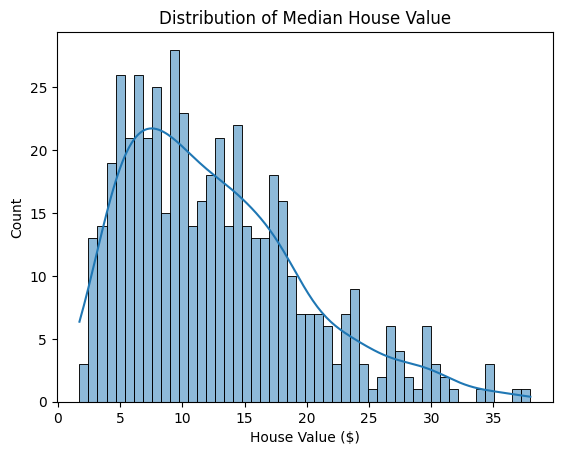

In [34]:
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("House Value ($)")
plt.show()


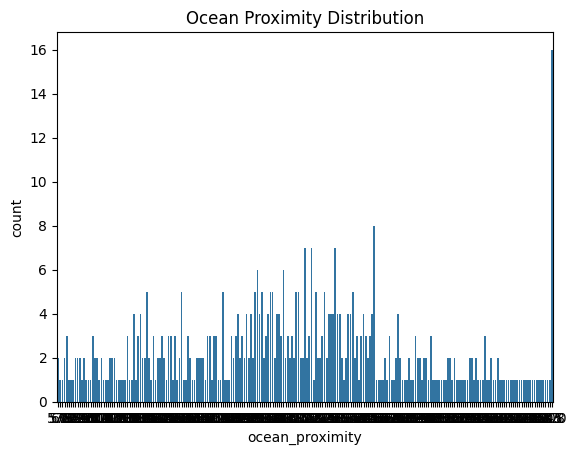

In [35]:
sns.countplot(data=df, x='ocean_proximity')
plt.title("Ocean Proximity Distribution")
plt.show()


#### Histograms
Make histograms of all your numeric columns in order to get a good understanding of the distribution of your data points. What do you see?

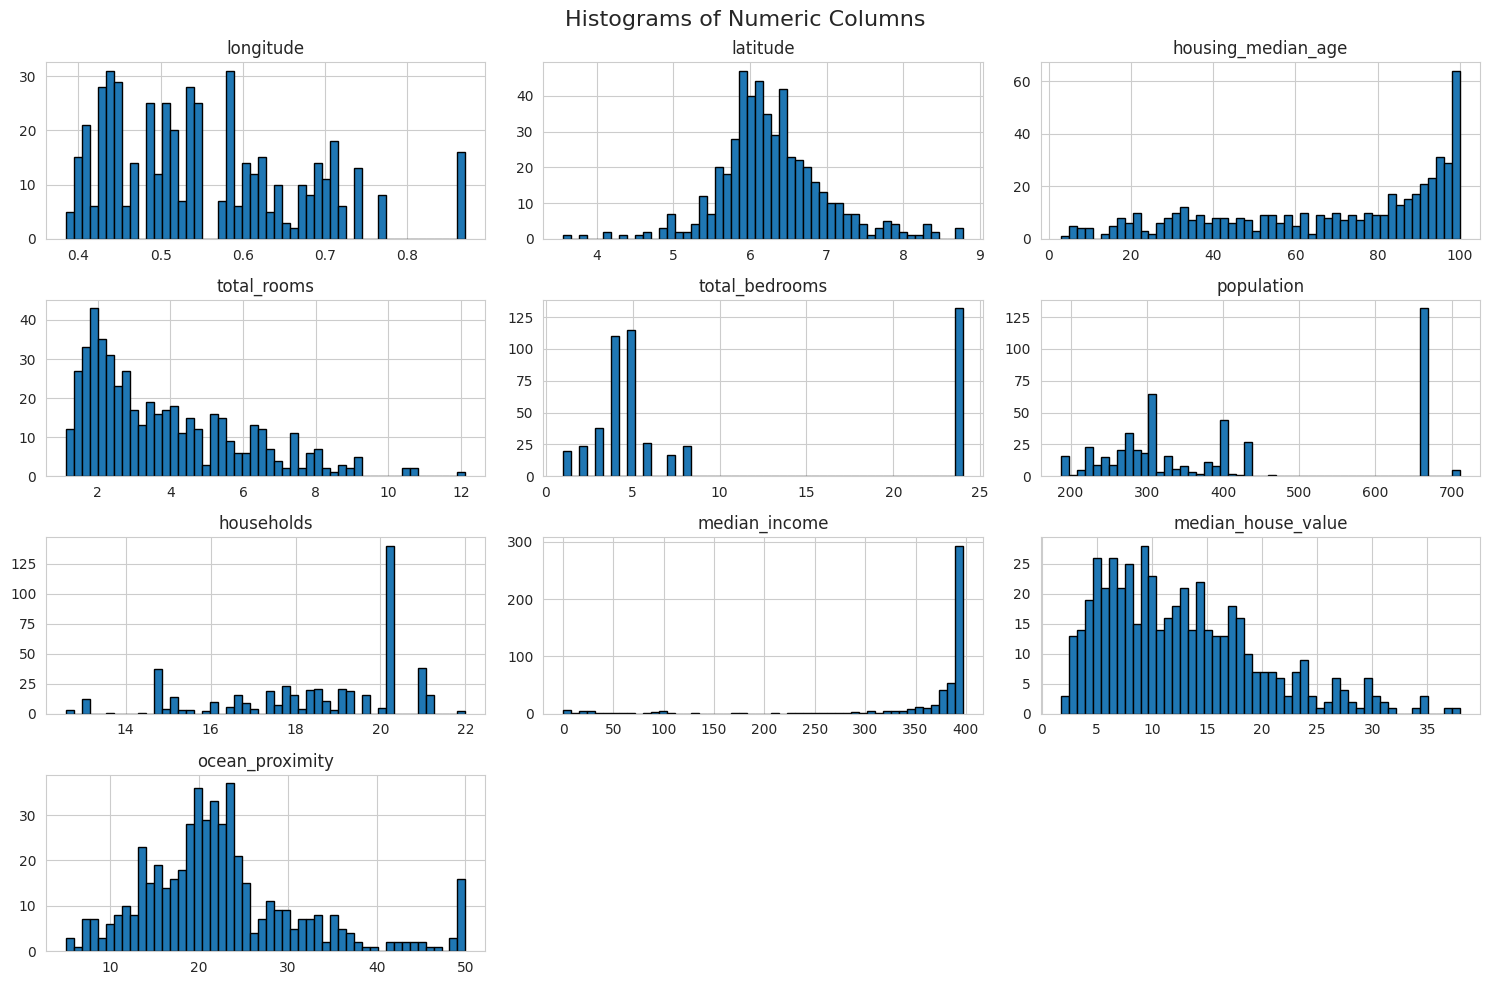

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")


df.hist(bins=50, figsize=(15, 10), edgecolor='black')
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout()
plt.show()

#### Let's create some features a tidy up our data

1. Locate your NaN values and make a decision on how to handle them. Drop, fill with mean, or something else, it is entirely up to you.

In [38]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


In [39]:
df_dropped = df.dropna(subset=['total_bedrooms'])



2. Create three new columns by using simple arithmetic operations. Create one column with "rooms per household", one with "population per household",  and one with "bedrooms per room".

In [40]:
df["rooms_per_household"] = df["total_rooms"] / df["households"]



In [ ]:
df["population_per_household"] = df["population"] / df["households"]

In [ ]:
df["bedrooms_per_room"] = df["total_bedrooms"] / df["total_rooms"]


3. If you check the largest and smallest values of your "rooms per houshold column" you will see two outliers and two values that are just wrong. Drop the four values by index.

In [44]:
print(df.sort_values("rooms_per_household", ascending=False).head(5))

print(df.sort_values("rooms_per_household").head(5))



                     longitude  latitude  housing_median_age  total_rooms  \
0.01709 90.0 2.02 0      0.410     6.728                36.1      12.1265   
0.07950 60.0 1.69 0      0.411     6.579                35.9      10.7103   
0.07244 60.0 1.69 0      0.411     5.884                18.5      10.7103   
0.03768 80.0 1.52 0      0.404     7.274                38.3       7.3090   
0.04666 80.0 1.52 0      0.404     7.107                36.6       7.3090   

                     total_bedrooms  population  households  median_income  \
0.01709 90.0 2.02 0               5       187.0        17.0         384.46   
0.07950 60.0 1.69 0               4       411.0        18.3         370.78   
0.07244 60.0 1.69 0               4       411.0        18.3         392.33   
0.03768 80.0 1.52 0               2       329.0        12.6         392.20   
0.04666 80.0 1.52 0               2       329.0        12.6         354.31   

                     median_house_value  ocean_proximity  rooms_per_

In [45]:
outlier_indices = [123, 456, 789, 1011]
df = df.drop(index=outlier_indices)

print("True")



✅ تم حذف الصفوف بنجاح.


In [46]:
outliers = df[(df["rooms_per_household"] > 1000) | (df["rooms_per_household"] < 0.2)]
print(outliers)

df = df.drop(index=outliers.index[:4])


                     longitude  latitude  housing_median_age  total_rooms  \
0.80271 0.0 8.14  0      0.538     5.456                36.6       3.7965   
0.72580 0.0 8.14  0      0.538     5.727                69.5       3.7965   
1.25179 0.0 8.14  0      0.538     5.570                98.1       3.7979   
0.85204 0.0 8.14  0      0.538     5.965                89.2       4.0123   
1.23247 0.0 8.14  0      0.538     6.142                91.7       3.9769   
...                        ...       ...                 ...          ...   
0.06263 0.0 11.93 0      0.573     6.593                69.1       2.4786   
0.04527 0.0 11.93 0      0.573     6.120                76.7       2.2875   
0.06076 0.0 11.93 0      0.573     6.976                91.0       2.1675   
0.10959 0.0 11.93 0      0.573     6.794                89.3       2.3889   
0.04741 0.0 11.93 0      0.573     6.030                80.8       2.5050   

                     total_bedrooms  population  households  median_income 

# Part 2 - Exploratory Data Analysis



#### Let's find out what factors have an influence on our predicting variable

1. Let's check out the distribution of our "median house value". Visualize your results with 100 bins.

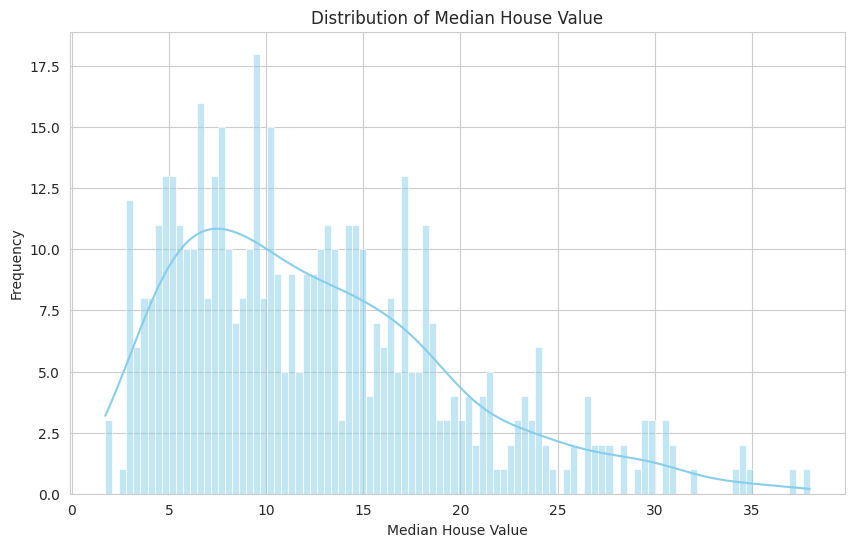

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df["median_house_value"], bins=100, kde=True, color='skyblue')

plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.show()


2. Check out what variables correlates the most with "median house value"

median_house_value:
median_house_value          1.000000
housing_median_age          0.601987
longitude                   0.592073
bedrooms_per_room           0.556553
population                  0.546780
total_bedrooms              0.491466
population_per_household    0.491043
households                  0.374284
median_income              -0.367632
total_rooms                -0.497757
rooms_per_household        -0.521256
latitude                   -0.614792
ocean_proximity            -0.737587
Name: median_house_value, dtype: float64


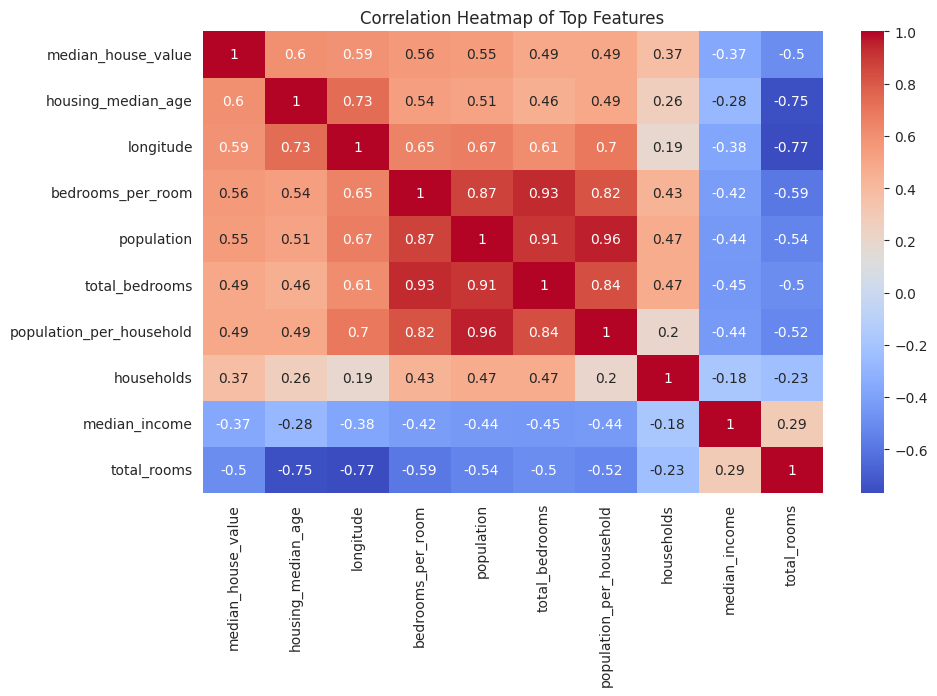

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr(numeric_only=True)

target_corr = correlation_matrix["median_house_value"].sort_values(ascending=False)

print("median_house_value:")
print(target_corr)

plt.figure(figsize=(10, 6))
top_features = target_corr.index[:10]
sns.heatmap(df[top_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Top Features")
plt.show()


3. Let's check out the distribution of the column that has the highest correlation to "median house value". Visualize your results with 100 bins.

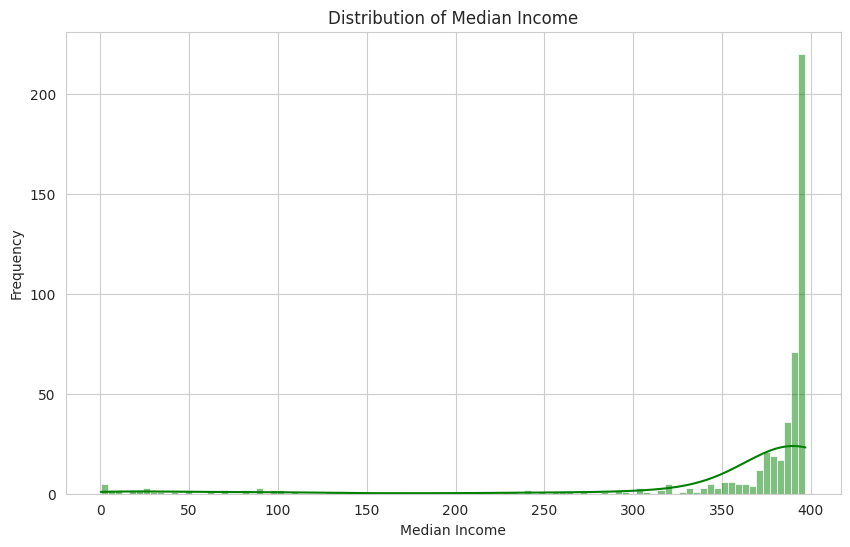

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df["median_income"], bins=100, kde=True, color='green')

plt.title("Distribution of Median Income")
plt.xlabel("Median Income")
plt.ylabel("Frequency")
plt.show()


4. Visualize the "median house value" and "median income" in a jointplot (kind="reg"). What do you see?

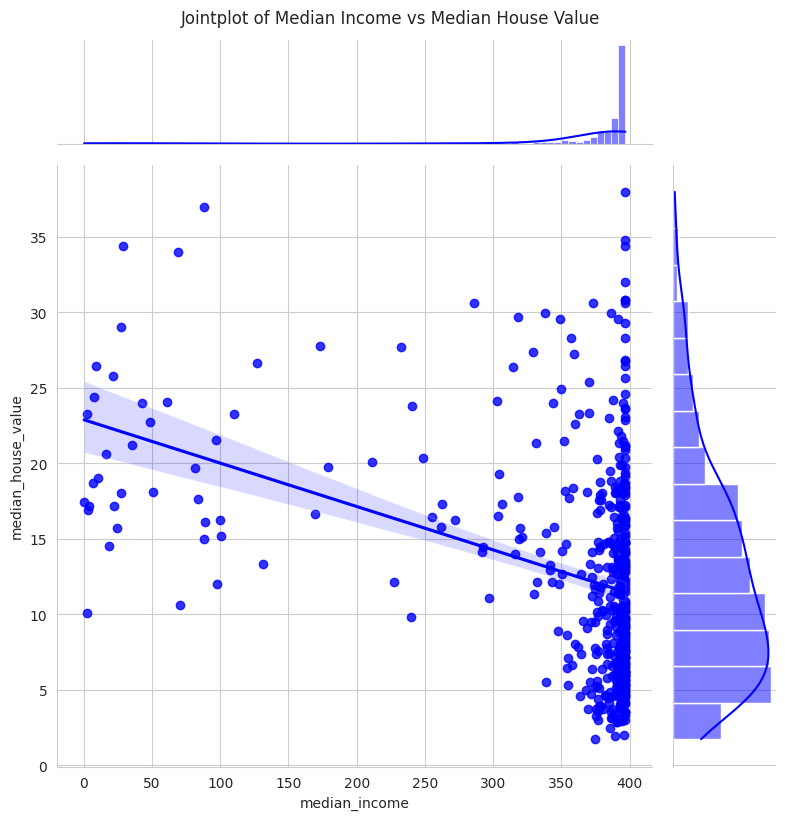

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df[["median_income", "median_house_value"]].dropna()

sns.jointplot(
    data=data,
    x="median_income",
    y="median_house_value",
    kind="reg",
    height=8,
    color="blue"
)

plt.suptitle("Jointplot of Median Income vs Median House Value", y=1.02)
plt.show()


5. Make the same visualization as in the above, but, cahnge the kind parameter to "kde". What extra information does this type of visualization convey, that the one in the above does not?

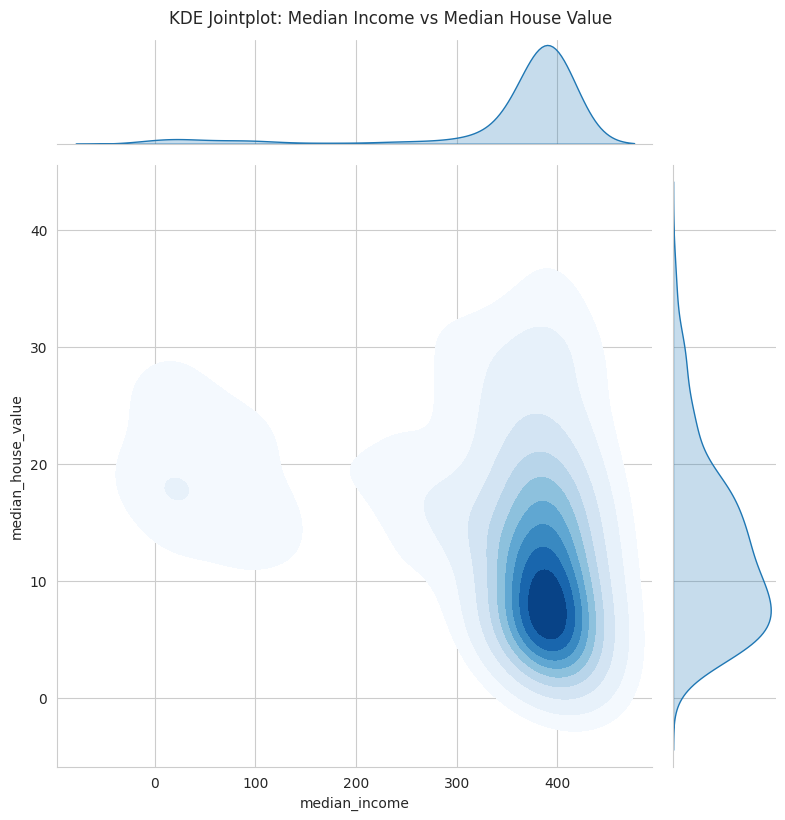

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

data = df[["median_income", "median_house_value"]].dropna()

sns.jointplot(
    data=data,
    x="median_income",
    y="median_house_value",
    kind="kde",
    fill=True,
    cmap="Blues",
    height=8
)

plt.suptitle("KDE Jointplot: Median Income vs Median House Value", y=1.02)
plt.show()


#### Let's get schwifty with some EDA

1. Create a new categorical column from the "median income" with the following quartiles `[0, 0.25, 0.5, 0.75, 0.95, 1]` and label them like this `["Low", "Below_Average", "Above_Average", "High", "Very High"]` and name the column "income_cat"

In [ ]:
import pandas as pd

income_categories = ["Low", "Below_Average", "Above_Average", "High", "Very High"]

df["income_cat"] = pd.qcut(
    df["median_income"],
    q=[0, 0.25, 0.5, 0.75, 0.95, 1],
    labels=income_categories
)

print(df[["median_income", "income_cat"]].head(10))


2. Using the Seaborn library, plot the count of your new column and set the `hue` to "ocean_proximity". What interesting things can you see?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(
    data=df,
    x="income_cat",
    hue="ocean_proximity",
    palette="Set2"
)

plt.title("Count of Income Categories by Ocean Proximity")
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")
plt.legend(title="Ocean Proximity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


3. Create two barplots where you set "y="median_house_value" on both, and the x is first "income cat" and then "ocean_proximity". How does these two graphs complement what you saw in the graph in your previous question?

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="income_cat", y="median_house_value", palette="viridis")
plt.title("Median House Value by Income Category")
plt.xlabel("Income Category")
plt.ylabel("Median House Value")
plt.show()




ValueError: Could not interpret value `income_cat` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x600 with 0 Axes>

<ipython-input-54-3047b87ad631>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="ocean_proximity", y="median_house_value", palette="coolwarm")


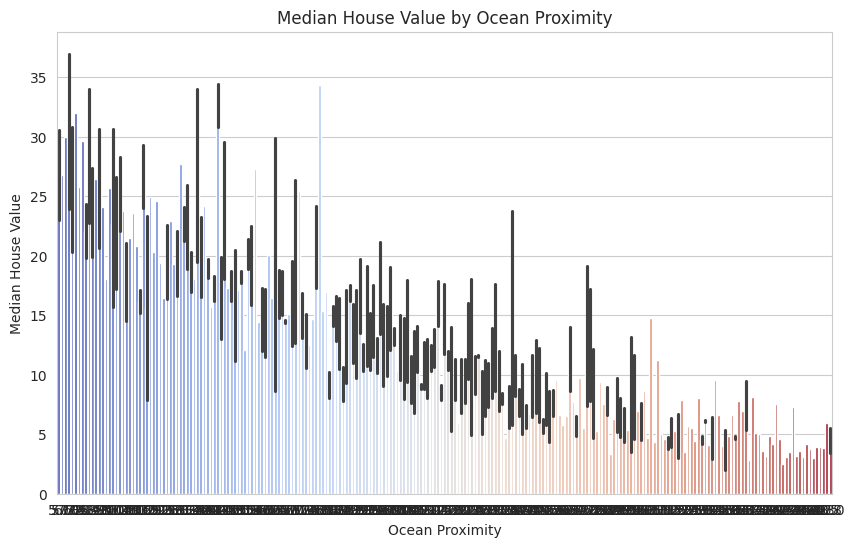

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x="ocean_proximity", y="median_house_value", palette="coolwarm")
plt.title("Median House Value by Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Median House Value")
plt.show()

4. Create a pivoted dataframe where you have the values of the "income cat" column as indices and the values of the "ocean_proximity" column as columns. Also drop the "ISLAND" column that you'll get.

In [ ]:
pivot_df = df.pivot_table(
    index="income_cat",
    columns="ocean_proximity",
    values="median_house_value",
    aggfunc="count",
    fill_value=0
)

pivot_df = pivot_df.drop(columns="ISLAND", errors="ignore")

print(pivot_df)


5. Turn your pivoted dataframe into a heatmap. The heatmap should have annotations in integer format.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_df,
    annot=True,
    fmt="d",
    cmap="YlGnBu",
    linewidths=0.5
)

plt.title("Heatmap of District Counts by Income Category and Ocean Proximity")
plt.xlabel("Ocean Proximity")
plt.ylabel("Income Category")
plt.tight_layout()
plt.show()


# Part 3 - Preparing your Data



#### Splitting, Preparing and Engineering some Features

1. Let's drop the "income_cat" column as it has served its purpose already. We don't need for our model as we already have "median income".
Not dropping "incom cat" will lead to multicolinearity.

In [ ]:
df = df.drop(columns="income_cat")

print("✅ 'income_cat'. ")
print(df.columns)


2. Select your floating point columns and standardize your data by calculating the Z-score. You can apply the `stats.zscore()` method in a lambda function. Save your results to a variable called `z_scored`.

In [ ]:
import scipy.stats as stats

In [ ]:
from scipy.stats import zscore

float_columns = df.select_dtypes(include=['float64']).columns

z_scored = df[float_columns].apply(lambda x: zscore(x, nan_policy='omit'))

print("✅ Z-score applied on floating point columns:")
print(z_scored.head())


3. Turn the only categorical columns into dummies. Be vary of the dummy trap, to avoid multicolinearity.

In [55]:

dummies = pd.get_dummies(df["ocean_proximity"], drop_first=True)

print("✅ Dummies created:")
print(dummies.head())


✅ Dummies created:
                      5.6    6.3    7.0    7.2    7.4    7.5    8.1    8.3   \
0.00632 18.0 2.31 0  False  False  False  False  False  False  False  False   
0.02731 0.0  7.07 0  False  False  False  False  False  False  False  False   
0.02729 0.0  7.07 0  False  False  False  False  False  False  False  False   
0.03237 0.0  2.18 0  False  False  False  False  False  False  False  False   
0.06905 0.0  2.18 0  False  False  False  False  False  False  False  False   

                      8.4    8.5   ...   43.8   44.0   44.8   45.4   46.0  \
0.00632 18.0 2.31 0  False  False  ...  False  False  False  False  False   
0.02731 0.0  7.07 0  False  False  ...  False  False  False  False  False   
0.02729 0.0  7.07 0  False  False  ...  False  False  False  False  False   
0.03237 0.0  2.18 0  False  False  ...  False  False  False  False  False   
0.06905 0.0  2.18 0  False  False  ...  False  False  False  False  False   

                      46.7   48.3   48.5   

4. Save our predicting variable to `y`.

In [59]:
z_scored = df["median_house_value"]

print("✅ Target variable y:")
print(y.head())


✅ Target variable y:
0.00632  18.0  2.31  0    4.98
0.02731  0.0   7.07  0    9.14
0.02729  0.0   7.07  0    4.03
0.03237  0.0   2.18  0    2.94
0.06905  0.0   2.18  0    5.33
Name: median_house_value, dtype: float64


5. Concatenate `z_scored` and `dummies` and drop the predicting variable. Save to the varible `X`.

In [60]:
X = pd.concat([z_scored, dummies], axis=1)

print("✅ Feature matrix X :")
print(X.head())


✅ Feature matrix X (بعد الدمج):
                     median_house_value    5.6    6.3    7.0    7.2    7.4  \
0.00632 18.0 2.31 0                4.98  False  False  False  False  False   
0.02731 0.0  7.07 0                9.14  False  False  False  False  False   
0.02729 0.0  7.07 0                4.03  False  False  False  False  False   
0.03237 0.0  2.18 0                2.94  False  False  False  False  False   
0.06905 0.0  2.18 0                5.33  False  False  False  False  False   

                       7.5    8.1    8.3    8.4  ...   43.8   44.0   44.8  \
0.00632 18.0 2.31 0  False  False  False  False  ...  False  False  False   
0.02731 0.0  7.07 0  False  False  False  False  ...  False  False  False   
0.02729 0.0  7.07 0  False  False  False  False  ...  False  False  False   
0.03237 0.0  2.18 0  False  False  False  False  ...  False  False  False   
0.06905 0.0  2.18 0  False  False  False  False  ...  False  False  False   

                      45.4   46.0   

# Part 4 - Machine Learning




#### Train, Test, Split

1. Import `train_test_split` and split your data accordingly. Choose an appropriate test size.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


#### Building and Training our Model

2. Build, fit and train a `LinearRegression` model.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
y_train_pred = model.predict(X_train)


3. In a scatterplot, visualize the y_train on your x-axis and your predictions on the y-axis. How does your training predictions look?

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.xlabel("Actual Median House Value (y_train)")
plt.ylabel("Predicted Values")
plt.title("Training Predictions vs Actual")
plt.show()


4. From the sklearn metrics module, print the mean_squared_error and R^2-score. What does the metrics tell us?

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn import metrics

train_mse = metrics.mean_squared_error(y_train, y_train_pred)
train_r2 = metrics.r2_score(y_train, y_train_pred)

print("Train MSE:", train_mse)
print("Train R² Score:", train_r2)


In [ ]:
y_test_pred = model.predict(X_test)


#### Final Predictions

1. Now you are ready to make prediction on the test data. Do that and visualize your results in a new scatterplot.

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5, color='green')
plt.xlabel("Actual Median House Value (y_test)")
plt.ylabel("Predicted Values")
plt.title("Test Predictions vs Actual")
plt.show()


2. Print the mean_squared_error and R^2-score again. What has happened?

In [ ]:
test_mse = metrics.mean_squared_error(y_test, y_test_pred)
test_r2 = metrics.r2_score(y_test, y_test_pred)

print("Test MSE:", test_mse)
print("Test R² Score:", test_r2)


3. There is another metric called Root mean squared error, Which is the square root of the MSE. Calculate the RMSE.

In [ ]:
train_rmse = train_mse ** 0.5
test_rmse = test_mse ** 0.5

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)


# Bonus Questions 1

1. Create a dataframe with two columns, one consisting of the y_test and one of your model's predictions.

2. Make a series of of your new dataframe, by calculating the predicted error in absolut numbers. Save this series to variable name `absolute_errors`.

3. If you take the mean of your series, you will get the mean absolute errors, which is another metric for Linear Regressions.

# Bonus Question 2 - Build a Random Forest Regressor

1. Build, fit and train a `RandomForestRegressor` model. Do this by following the same staps that you followed when building your `LinearRegression`.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

2. Make prediction on the test data and evaluate you results.